In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('../data/original-data/Jmaps.csv', index_col = [0])
df.loc[df['nameClass'].str.contains('_\$\$_'),'nameClass'] = df.loc[df['nameClass'].str.contains('_\$\$_'),'nameClass'].apply(lambda x : x.split('_$$_')[0])
df.loc[df['nameClass'].str.contains('\$\$'),'nameClass'] = df.loc[df['nameClass'].str.contains('\$\$'),'nameClass'].apply(lambda x : x.split('$$')[0])
df = df.drop_duplicates()
df = df.groupby(['timestamp','server','nameClass']).sum().reset_index()
df.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes
0,2021-07-25T09:10:57Z,NFBTGBZEVDR,[B,78946,10,15286040
1,2021-07-25T09:10:57Z,NFBTGBZEVDR,[C,1216019,1,209569240
2,2021-07-25T09:10:57Z,NFBTGBZEVDR,[F,1741,377,48608
3,2021-07-25T09:10:57Z,NFBTGBZEVDR,[I,234572,19,8447184
4,2021-07-25T09:10:57Z,NFBTGBZEVDR,[J,5512,79,1159688


In [3]:
df_oom = pd.read_csv('../data/original-data/Jmaps-OOM.csv', index_col = [0])
df_oom.loc[df_oom['nameClass'].str.contains('_\$\$_'),'nameClass'] = df_oom.loc[df_oom['nameClass'].str.contains('_\$\$_'),'nameClass'].apply(lambda x : x.split('_$$_')[0])
df_oom.loc[df_oom['nameClass'].str.contains('\$\$'),'nameClass'] = df_oom.loc[df_oom['nameClass'].str.contains('\$\$'),'nameClass'].apply(lambda x : x.split('$$')[0])
df_oom = df_oom.drop_duplicates()
df_oom = df_oom.groupby(['timestamp','server','nameClass']).sum().reset_index()
df_oom.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes
0,2020-12-01T16:26:00Z,BZZBGB0JRID,[B,27870118,1,951714752
1,2020-12-01T16:26:00Z,BZZBGB0JRID,[C,2135077,6,433637784
2,2020-12-01T16:26:00Z,BZZBGB0JRID,[I,736576,14,34709920
3,2020-12-01T16:26:00Z,BZZBGB0JRID,[J,7396,39,8245664
4,2020-12-01T16:26:00Z,BZZBGB0JRID,[Lcom.lowagie.text.pdf.IntHashtable$Entry;,15,447,90224


In [4]:
metadata = pd.read_csv('../data/original-data/all-instances-metadata.csv', index_col = [0])
metadata = metadata[metadata['Xms'].notna()]
metadata = metadata [['server', 'softwareType', 'softwareVersion', 'databaseVersion', 'HibernateVersion', '#weeklyUsers', 'swap', 'Xms', 'Xmx', 'serverGroup']]
metadata.head()

,server,softwareType,softwareVersion,databaseVersion,HibernateVersion,#weeklyUsers,swap,Xms,Xmx,serverGroup
0,UBXDGB4D,Sales,V8_1,19.0.0.0.0,NaN,4.0,6.442447e+09,6.291456e+09,6.291456e+09,WIRYGBSH
1,EYQDGBII7N0,Sales,V8_1,19.0.0.0.0,NaN,55.0,6.442447e+09,6.291456e+09,6.291456e+09,WIRYGBSH
2,YUDQGBIT,Sales,V7_1,11.2.0.3.0,NaN,NaN,1.718406e+10,6.291456e+09,6.291456e+09,JSAZGBPP
5,LHVQGBIL,Sales,V11_1,11.2.0.3.0,NaN,55.0,6.291448e+09,6.291456e+09,6.291456e+09,JQMJGBT7
6,TBEUGBJN1CQ,Factory,V15_1,12.2.0.1.0,5.2.17.Final-infologic-10,20.0,6.442447e+09,4.294967e+09,4.294967e+09,BIHMGBTW


In [5]:
dict_instances = dict(zip(metadata.server, metadata.softwareType))

In [6]:
df['softwareType'] = df['server'].apply(lambda x : dict_instances[x])
df.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2021-07-25T09:10:57Z,NFBTGBZEVDR,[B,78946,10,15286040,Factory
1,2021-07-25T09:10:57Z,NFBTGBZEVDR,[C,1216019,1,209569240,Factory
2,2021-07-25T09:10:57Z,NFBTGBZEVDR,[F,1741,377,48608,Factory
3,2021-07-25T09:10:57Z,NFBTGBZEVDR,[I,234572,19,8447184,Factory
4,2021-07-25T09:10:57Z,NFBTGBZEVDR,[J,5512,79,1159688,Factory


In [7]:
'uncharacterized servers'
set(df_oom['server'].unique()) - set(metadata['server'].unique())

{'ALIGGBNF', 'KNZFGBOO'}

In [8]:
df_oom.drop(df_oom[df_oom['server'] == 'ALIGGBNF'].index, inplace = True)
df_oom.drop(df_oom[df_oom['server'] == 'KNZFGBOO'].index, inplace = True)

In [9]:
df_oom['softwareType'] = df_oom['server'].apply(lambda x : dict_instances[x])
df_oom.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2020-12-01T16:26:00Z,BZZBGB0JRID,[B,27870118,1,951714752,Sales
1,2020-12-01T16:26:00Z,BZZBGB0JRID,[C,2135077,6,433637784,Sales
2,2020-12-01T16:26:00Z,BZZBGB0JRID,[I,736576,14,34709920,Sales
3,2020-12-01T16:26:00Z,BZZBGB0JRID,[J,7396,39,8245664,Sales
4,2020-12-01T16:26:00Z,BZZBGB0JRID,[Lcom.lowagie.text.pdf.IntHashtable$Entry;,15,447,90224,Sales


In [10]:
'Total number of snapshots in 7 Sundays'
df.groupby(['server','timestamp']).size().reset_index().shape[0]

3074

In [11]:
'Number of snapshots per server in Sundays'
df.groupby(['server','timestamp']).size().reset_index().groupby('server').size().sort_values(ascending = False)

server
AANNGBE51AX    7
TIWRGBG1AMQ    7
RMWZGBB3       7
RKGNGBFT5QW    7
RKCAGBCI9TQ    7
              ..
VOYOGBO8       1
ZNNIGB2F       1
CWPHGBP1N5Z    1
JRVCGBTSAG7    1
PQEXGBR7       1
Length: 460, dtype: int64

In [12]:
'Total number of oom snapshots'
df_oom.groupby(['server','timestamp']).size().reset_index().shape[0]

1087

In [13]:
df_oom[df_oom['softwareType'] == 'Factory'].groupby(['server','timestamp']).size().reset_index().shape[0]

159

In [14]:
df_oom['softwareType'].value_counts().values[:2].sum() / df_oom['softwareType'].value_counts().values[:].sum()

0.8797556239604423

In [15]:
df['server'].nunique()

460

In [16]:
df_oom['server'].nunique()

106

In [17]:
'Number of oom snapshots per server'
df_oom.groupby(['server','timestamp']).size().reset_index().groupby('server').size().sort_values(ascending = False)

server
XCEZGBAA       268
VTMFGBJ8321    183
GCHFGBKM       107
VANPGBOI        75
GUCUGBE0Q7K     30
              ... 
SIVGGB99         1
SJZVGBQLKRB      1
SKMBGBT5         1
TCULGBFM         1
AANNGBE51AX      1
Length: 106, dtype: int64

In [18]:
healthyServers = set(df['server'].unique()) - set(df_oom['server'].unique())
round(len(healthyServers) / df['server'].nunique(),2)

0.78

In [19]:
'We keep only healthy servers'
df = df[df['server'].isin(healthyServers)]
df.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2021-07-25T09:10:57Z,NFBTGBZEVDR,[B,78946,10,15286040,Factory
1,2021-07-25T09:10:57Z,NFBTGBZEVDR,[C,1216019,1,209569240,Factory
2,2021-07-25T09:10:57Z,NFBTGBZEVDR,[F,1741,377,48608,Factory
3,2021-07-25T09:10:57Z,NFBTGBZEVDR,[I,234572,19,8447184,Factory
4,2021-07-25T09:10:57Z,NFBTGBZEVDR,[J,5512,79,1159688,Factory


In [20]:
'Transform size Byte to size MB for both datasets'
df['sizeBytes'] = df['sizeBytes'] // 1000000
df_oom['sizeBytes'] = df_oom['sizeBytes'] // 1000000

In [21]:
'Take for each server classes with rang >= 100'
df_oom = df_oom.groupby(['server','timestamp']).apply(lambda x: x.sort_values(by = 'sizeBytes',ascending = False)[:100]).reset_index(drop = True)
df_oom.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2021-02-14T17:20:15Z,AANNGBE51AX,[C,2116720,1,430,Sales
1,2021-02-14T17:20:15Z,AANNGBE51AX,[Ljava.lang.Object;,3275522,2,160,Sales
2,2021-02-14T17:20:15Z,AANNGBE51AX,java.lang.reflect.Method,1741373,3,153,Sales
3,2021-02-14T17:20:15Z,AANNGBE51AX,java.lang.String,5537885,4,132,Sales
4,2021-02-14T17:20:15Z,AANNGBE51AX,java.util.HashMap$Node,3787563,5,121,Sales


In [22]:
df_sv = df[df['softwareType'] == 'Factory'].reset_index(drop = True)
del df_sv['softwareType']

df_oom_sv = df_oom[df_oom['softwareType'] == 'Factory'].reset_index(drop = True)
del df_oom_sv['softwareType']

In [23]:
df_sv = df_sv[df_sv['nameClass'].isin(df_oom_sv['nameClass'].unique())].reset_index(drop = True)
df_oom_sv = df_oom_sv[df_oom_sv['nameClass'].isin(df_sv['nameClass'].unique())].reset_index(drop = True)

In [24]:
classes_flatten_sv = df_sv.groupby(['server','timestamp']).apply(lambda x : dict(zip(x.nameClass, x.sizeBytes)))
df_sv_flatten = pd.DataFrame(0, index = classes_flatten_sv.index, columns = df_sv['nameClass'].unique()).reset_index()
df_sv_flatten = df_sv_flatten.set_index(['server','timestamp'])
for classe in df_sv['nameClass'].unique():
    df_sv_flatten[classe] = classes_flatten_sv.apply(lambda x : x[classe] if classe in x else 0)

In [25]:
classes_flatten_oom_sv = df_oom_sv.groupby(['server','timestamp']).apply(lambda x : dict(zip(x.nameClass, x.sizeBytes)))
df_oom_sv_flatten = pd.DataFrame(0, index = classes_flatten_oom_sv.index, columns = df_oom_sv['nameClass'].unique()).reset_index()
df_oom_sv_flatten = df_oom_sv_flatten.set_index(['server','timestamp'])
for classe in df_oom_sv['nameClass'].unique():
    df_oom_sv_flatten[classe] = classes_flatten_oom_sv.apply(lambda x : x[classe] if classe in x else 0)

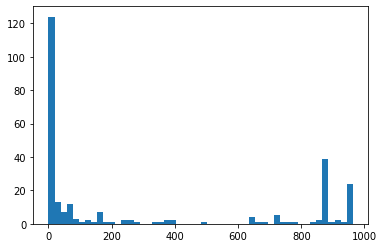

In [26]:
'y = number of classes'
'x = frequency of occurence w.r.t nb snapshots'
plt.hist((df_sv_flatten != 0).astype(int).sum(axis=0), 50, alpha = 1, density = False)
plt.show()

In [27]:
'smallest required of snapshots per class number to form a distribution'
min_dist = 10

In [28]:
df_sv_flatten = df_sv_flatten[list((df_sv_flatten != 0).astype(int).sum(axis=0)[(df_sv_flatten != 0).astype(int).sum(axis=0) >= min_dist].index)]
df_oom_sv_flatten = df_oom_sv_flatten[list((df_sv_flatten != 0).astype(int).sum(axis=0)[(df_sv_flatten != 0).astype(int).sum(axis=0) >= min_dist].index)]

In [29]:
df_sv_flatten['sum'] = df_sv_flatten.sum(axis = 1)
df_oom_sv_flatten['sum'] = df_oom_sv_flatten.sum(axis = 1)

In [30]:
df_sv_flatten.head()

[B   [C  [I  [J  [Ljava.lang.Class;  \
server   timestamp                                                   
AGUKGBDY 2021-07-25T09:20:57Z  14  170   6   1                   6   
         2021-08-01T09:20:33Z  14  170   6   1                   6   
         2021-08-08T09:20:42Z  17  198  13   1                   6   
         2021-08-15T09:20:23Z  16  200  13   1                   6   
         2021-08-22T09:20:11Z  18  202  12   1                   6   

                               [Ljava.lang.Object;  [Ljava.lang.String;  \
server   timestamp                                                        
AGUKGBDY 2021-07-25T09:20:57Z                   31                   37   
         2021-08-01T09:20:33Z                   31                   37   
         2021-08-08T09:20:42Z                   37                   40   
         2021-08-15T09:20:23Z                   37                   40   
         2021-08-22T09:20:11Z                   37                   40   

                               [Ljava.lang.reflect.Method;  \
server   timestamp                                           
AGUKGBDY 2021-07-25T09:20:57Z                            1   
         2021-08-01T09:20:33Z                            1   
         2021-08-08T09:20:42Z                            1   
         2021-08-15T09:20:23Z                            1   
         2021-08-22T09:20:11Z                            1   

                               [Ljava.util.HashMap$Node;  \
server   timestamp                                         
AGUKGBDY 2021-07-25T09:20:57Z                         26   
         2021-08-01T09:20:33Z                         26   
         2021-08-08T09:20:42Z                         33   
         2021-08-15T09:20:23Z                         34   
         2021-08-22T09:20:11Z                         33   

                               [Ljava.util.Hashtable$Entry;  ...  \
server   timestamp                                           ...   
AGUKGBDY 2021-07-25T09:20:57Z                             1  ...   
         2021-08-01T09:20:33Z                             1  ...   
         2021-08-08T09:20:42Z                             2  ...   
         2021-08-15T09:20:23Z                             2  ...   
         2021-08-22T09:20:11Z                             2  ...   

                               org.apache.velocity.runtime.parser.Token  \
server   timestamp                                                        
AGUKGBDY 2021-07-25T09:20:57Z                                         0   
         2021-08-01T09:20:33Z                                         0   
         2021-08-08T09:20:42Z                                         0   
         2021-08-15T09:20:23Z                                         0   
         2021-08-22T09:20:11Z                                         0   

                               fr.infologic.global.commun.modele.SiteFamZVVal  \
server   timestamp                                                              
AGUKGBDY 2021-07-25T09:20:57Z                                               0   
         2021-08-01T09:20:33Z                                               0   
         2021-08-08T09:20:42Z                                               0   
         2021-08-15T09:20:23Z                                               0   
         2021-08-22T09:20:11Z                                               0   

                               fr.infologic.infoc.services.infocentre.ColumnInfo  \
server   timestamp                                                                 
AGUKGBDY 2021-07-25T09:20:57Z                                                  0   
         2021-08-01T09:20:33Z                                                  0   
         2021-08-08T09:20:42Z                                                  0   
         2021-08-15T09:20:23Z                                                  0   
         2021-08-22T09:20:11Z                                                  0   

In [31]:
df_oom_sv_flatten.head()

[B   [C   [I  [J  [Ljava.lang.Class;  \
server   timestamp                                                     
DOFPGBN2 2021-05-19T12:02:38Z  996  638  184   6                   8   
         2021-06-10T16:50:29Z  203  755   42   6                   8   
         2021-06-10T16:53:51Z  716  651  378   0                   7   
         2021-06-16T10:59:28Z  776  890  377   9                   9   
         2021-07-13T01:12:23Z  169  649   15   0                   7   

                               [Ljava.lang.Object;  [Ljava.lang.String;  \
server   timestamp                                                        
DOFPGBN2 2021-05-19T12:02:38Z                  409                   40   
         2021-06-10T16:50:29Z                  317                   39   
         2021-06-10T16:53:51Z                  495                   39   
         2021-06-16T10:59:28Z                  517                   41   
         2021-07-13T01:12:23Z                  352                   39   

                               [Ljava.lang.reflect.Method;  \
server   timestamp                                           
DOFPGBN2 2021-05-19T12:02:38Z                            0   
         2021-06-10T16:50:29Z                            0   
         2021-06-10T16:53:51Z                            0   
         2021-06-16T10:59:28Z                            2   
         2021-07-13T01:12:23Z                            0   

                               [Ljava.util.HashMap$Node;  \
server   timestamp                                         
DOFPGBN2 2021-05-19T12:02:38Z                        129   
         2021-06-10T16:50:29Z                        159   
         2021-06-10T16:53:51Z                        158   
         2021-06-16T10:59:28Z                        174   
         2021-07-13T01:12:23Z                        202   

                               [Ljava.util.Hashtable$Entry;  ...  \
server   timestamp                                           ...   
DOFPGBN2 2021-05-19T12:02:38Z                             3  ...   
         2021-06-10T16:50:29Z                             3  ...   
         2021-06-10T16:53:51Z                             3  ...   
         2021-06-16T10:59:28Z                             3  ...   
         2021-07-13T01:12:23Z                             3  ...   

                               org.apache.velocity.runtime.parser.Token  \
server   timestamp                                                        
DOFPGBN2 2021-05-19T12:02:38Z                                         0   
         2021-06-10T16:50:29Z                                         0   
         2021-06-10T16:53:51Z                                         0   
         2021-06-16T10:59:28Z                                         0   
         2021-07-13T01:12:23Z                                         0   

                               fr.infologic.global.commun.modele.SiteFamZVVal  \
server   timestamp                                                              
DOFPGBN2 2021-05-19T12:02:38Z                                               0   
         2021-06-10T16:50:29Z                                               0   
         2021-06-10T16:53:51Z                                               0   
         2021-06-16T10:59:28Z                                               0   
         2021-07-13T01:12:23Z                                               0   

                               fr.infologic.infoc.services.infocentre.ColumnInfo  \
server   timestamp                                                                 
DOFPGBN2 2021-05-19T12:02:38Z                                                  0   
         2021-06-10T16:50:29Z                                                  0   
         2021-06-10T16:53:51Z                                                  0   
         2021-06-16T10:59:28Z                                                  0   
         2021-07-13T01:12:23Z                                         

In [32]:
max_sum = max(df_oom_sv_flatten['sum'].max(), df_sv_flatten['sum'].max())
max_sum

6122

In [33]:
for classe in list(df_sv_flatten.columns)[:-1]:
    df_sv_flatten[classe] = df_sv_flatten[classe] * (max_sum / df_sv_flatten['sum'])
    df_sv_flatten[classe] = df_sv_flatten[classe].round()
    df_oom_sv_flatten[classe] = df_oom_sv_flatten[classe] * (max_sum / df_oom_sv_flatten['sum'])
    df_oom_sv_flatten[classe] = df_oom_sv_flatten[classe].round()

In [34]:
dist= df_sv_flatten['fr.infologic.core.services.droits.RightValue'][df_sv_flatten['fr.infologic.core.services.droits.RightValue'] > 0]
dist

server    timestamp           
BAEBGBBA  2021-07-25T09:18:21Z     7.0
          2021-08-01T09:18:01Z     7.0
          2021-08-08T09:18:21Z     7.0
          2021-08-15T09:18:22Z     7.0
          2021-08-22T09:18:25Z     7.0
                                  ... 
ZTVCGBPM  2021-08-08T09:19:09Z     6.0
          2021-08-15T09:19:08Z     6.0
          2021-08-22T09:19:13Z     6.0
          2021-08-29T09:19:15Z    12.0
          2021-09-05T10:40:49Z    12.0
Name: fr.infologic.core.services.droits.RightValue, Length: 156, dtype: float64

In [35]:
dist_oom = df_oom_sv_flatten['fr.infologic.core.services.droits.RightValue'][df_oom_sv_flatten['fr.infologic.core.services.droits.RightValue'] > 0]
dist_oom

server    timestamp           
DOFPGBN2  2021-05-19T12:02:38Z    105.0
          2021-06-10T16:50:29Z    158.0
          2021-06-10T16:53:51Z    129.0
          2021-06-16T10:59:28Z    127.0
          2021-07-13T01:12:23Z    193.0
                                  ...  
VANPGBOI  2021-07-23T12:31:12Z      5.0
          2021-07-27T05:50:46Z      7.0
          2021-07-29T10:21:37Z     12.0
          2021-07-30T13:11:43Z     15.0
          2021-08-02T18:38:54Z     17.0
Name: fr.infologic.core.services.droits.RightValue, Length: 104, dtype: float64

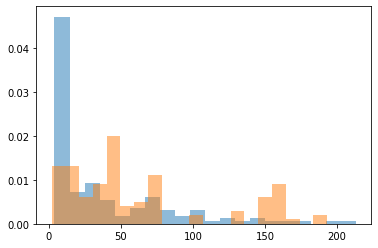

In [36]:
plt.hist(dist, 20, alpha = 0.5, density = True)
plt.hist(dist_oom, 20, alpha = 0.5, density = True)
plt.show()

### Data Model

In [37]:
import Utils

In [38]:
len(df_sv_flatten.columns)

154

In [39]:
tree = Utils.createTree(df_sv_flatten.columns[:-1])
tree.agregatePackages()

In [40]:
fileDAG = open('../data/data-sv/DAG-SV.txt', "w") 
fileItems = open('../data/data-sv/itemsNames-sv.txt', "w") 
fileDAG.write('parent,child\n') 
Utils.exportToText(tree, fileDAG, fileItems)
fileDAG.close()
fileItems.close()

In [41]:
fileSupportAll = open('../data/data-sv/supportAll-sv.txt', "w") 
s = Utils.supportAll(tree, df_sv_flatten, fileSupportAll) 
fileSupportAll.close()

In [42]:
df_sv_flatten

[B      [C     [I   [J  [Ljava.lang.Class;  \
server   timestamp                                                            
AGUKGBDY 2021-07-25T09:20:57Z  86.0  1049.0   37.0  6.0                37.0   
         2021-08-01T09:20:33Z  86.0  1050.0   37.0  6.0                37.0   
         2021-08-08T09:20:42Z  88.0  1020.0   67.0  5.0                31.0   
         2021-08-15T09:20:23Z  82.0  1024.0   67.0  5.0                31.0   
         2021-08-22T09:20:11Z  92.0  1037.0   62.0  5.0                31.0   
...                             ...     ...    ...  ...                 ...   
ZVOBGBF8 2021-08-08T09:17:28Z  88.0  1622.0  109.0  0.0                41.0   
         2021-08-15T09:17:29Z  87.0  1601.0  107.0  0.0                40.0   
         2021-08-22T09:17:30Z  81.0  1622.0  102.0  0.0                41.0   
         2021-08-29T09:17:33Z  93.0  1594.0  107.0  0.0                40.0   
         2021-09-05T09:21:42Z  94.0  1610.0  101.0  0.0                40.0   

                               [Ljava.lang.Object;  [Ljava.lang.String;  \
server   timestamp                                                        
AGUKGBDY 2021-07-25T09:20:57Z                191.0                228.0   
         2021-08-01T09:20:33Z                192.0                229.0   
         2021-08-08T09:20:42Z                191.0                206.0   
         2021-08-15T09:20:23Z                189.0                205.0   
         2021-08-22T09:20:11Z                190.0                205.0   
...                                            ...                  ...   
ZVOBGBF8 2021-08-08T09:17:28Z                238.0                251.0   
         2021-08-15T09:17:29Z                234.0                248.0   
         2021-08-22T09:17:30Z                238.0                251.0   
         2021-08-29T09:17:33Z                233.0                247.0   
         2021-09-05T09:21:42Z                236.0                249.0   

                               [Ljava.lang.reflect.Method;  \
server   timestamp                                           
AGUKGBDY 2021-07-25T09:20:57Z                          6.0   
         2021-08-01T09:20:33Z                          6.0   
         2021-08-08T09:20:42Z                          5.0   
         2021-08-15T09:20:23Z                          5.0   
         2021-08-22T09:20:11Z                          5.0   
...                                                    ...   
ZVOBGBF8 2021-08-08T09:17:28Z                          7.0   
         2021-08-15T09:17:29Z                          7.0   
         2021-08-22T09:17:30Z                          7.0   
         2021-08-29T09:17:33Z                          7.0   
         2021-09-05T09:21:42Z                          7.0   

                               [Ljava.util.HashMap$Node;  \
server   timestamp                                         
AGUKGBDY 2021-07-25T09:20:57Z                      160.0   
         2021-08-01T09:20:33Z                      161.0   
         2021-08-08T09:20:42Z                      170.0   
         2021-08-15T09:20:23Z                      174.0   
         2021-08-22T09:20:11Z                      169.0   
...                                                  ...   
ZVOBGBF8 2021-08-08T09:17:28Z                      645.0   
         2021-08-15T09:17:29Z                      643.0   
         2021-08-22T09:17:30Z                      645.0   
         2021-08-29T09:17:33Z                      640.0   
         2021-09-05T09:21:42Z                      640.0   

                               [Ljava.util.Hashtable$Entry;  ...  \
server   timestamp                                           ...   
AGUKGBDY 2021-07-25T09:20:57Z                           6.0  ...   
         2021-08-01T09:20:33Z                           6.0  ...   
         2021-08-08T09:20:42Z                          10.0  ...   
         2021-08-15T09:20:23Z                          10.0  ...   
         2021-08-22T09:20:11Z    

In [43]:
fileSupportAllZeros = open('../data/data-sv/supportAllZeros-sv.txt', "w") 
s = Utils.supportAllZeros(tree, df_sv_flatten, fileSupportAllZeros) 
fileSupportAllZeros.close()

In [44]:
treeVis = Utils.createGraphTree(tree, None)
treeVis.show()

Root : (0) : 6117
├── [B : (1) : 209
├── [C : (2) : 1462
├── [I : (3) : 92
├── [J : (4) : 7
├── [Ljava : (259) : 1022
│   ├── [Ljava.lang : (219) : 562
│   │   ├── [Ljava.lang.Class; : (5) : 45
│   │   ├── [Ljava.lang.Object; : (6) : 258
│   │   ├── [Ljava.lang.String; : (7) : 253
│   │   └── [Ljava.lang.reflect.Method; : (8) : 6
│   └── [Ljava.util : (217) : 460
│       ├── [Ljava.util.HashMap$Node; : (9) : 415
│       ├── [Ljava.util.Hashtable$Entry; : (10) : 15
│       └── [Ljava.util.concurrent.ConcurrentHashMap$Node; : (11) : 30
├── [Lorg : (293) : 36
│   ├── [Lorg.apache.commons.collections : (215) : 36
│   │   ├── [Lorg.apache.commons.collections.StaticBucketMap$Lock; : (12) : 18
│   │   └── [Lorg.apache.commons.collections.StaticBucketMap$Node; : (13) : 18
│   └── [Lorg.eclipse.jdt.internal.compiler.lookup.TypeBinding; : (14) : 0
├── [S : (15) : 1
├── [Z : (16) : 27
├── [[C : (17) : 1
├── [[Ljava.lang.String; : (18) : 38
├── antlr.ANTLRHashString : (19) : 21
├── com.ibm.icu.mat

In [45]:
treeSnapshot = Utils.createTree(df_sv_flatten.columns[:-1])
treeSnapshot.agregatePackages()
fileSupportSnapshot = open('../data/data-sv/supportSnapshot-sv.txt', "w")
idSnapshot = 10
s = Utils.supportSnapshot(treeSnapshot, df_oom_sv_flatten, idSnapshot, fileSupportSnapshot, withId = False) 
fileSupportSnapshot.close()

In [46]:
treeVisSnapshot = Utils.createGraphTree(treeSnapshot, None)
treeVisSnapshot.show()

Root : (0) : 6114
├── [B : (1) : 755
├── [C : (2) : 848
├── [I : (3) : 256
├── [J : (4) : 0
├── [Ljava : (259) : 831
│   ├── [Ljava.lang : (219) : 602
│   │   ├── [Ljava.lang.Class; : (5) : 7
│   │   ├── [Ljava.lang.Object; : (6) : 554
│   │   ├── [Ljava.lang.String; : (7) : 41
│   │   └── [Ljava.lang.reflect.Method; : (8) : 0
│   └── [Ljava.util : (217) : 229
│       ├── [Ljava.util.HashMap$Node; : (9) : 222
│       ├── [Ljava.util.Hashtable$Entry; : (10) : 3
│       └── [Ljava.util.concurrent.ConcurrentHashMap$Node; : (11) : 4
├── [Lorg : (293) : 4
│   ├── [Lorg.apache.commons.collections : (215) : 4
│   │   ├── [Lorg.apache.commons.collections.StaticBucketMap$Lock; : (12) : 2
│   │   └── [Lorg.apache.commons.collections.StaticBucketMap$Node; : (13) : 2
│   └── [Lorg.eclipse.jdt.internal.compiler.lookup.TypeBinding; : (14) : 0
├── [S : (15) : 0
├── [Z : (16) : 4
├── [[C : (17) : 0
├── [[Ljava.lang.String; : (18) : 6
├── antlr.ANTLRHashString : (19) : 4
├── com.ibm.icu.math.BigDecimal

In [47]:
fileSupportAllSnapshots = open('../data/data-sv/supportAllSnapshots-sv.txt', "w")
fileSnapshotNames = open('../data/data-sv/snapshotNames-sv.txt', "w")
Utils.supportAllSnapshot(df_oom_sv_flatten, fileSupportAllSnapshots, fileSnapshotNames)
fileSupportAllSnapshots.close()
fileSnapshotNames.close()

In [48]:
metadata_sv = df_oom_sv_flatten.reset_index()[['server']].join(metadata.set_index('server'), on='server')
metadata_sv['isWeekEndDay'] = pd.to_datetime(df_oom_sv_flatten.reset_index()['timestamp']).dt.tz_localize(None).dt.day_name().apply(lambda x : Utils.isWeekEndDay(x))
metadata_sv

,server,softwareType,softwareVersion,databaseVersion,HibernateVersion,#weeklyUsers,swap,Xms,Xmx,serverGroup,isWeekEndDay
0,DOFPGBN2,Factory,V15_2L,11.2.0.3.0,5.2.17.Final-infologic-10,125.0,1.288490e+10,6.442451e+09,6.442451e+09,FFCNGB1A,False
1,DOFPGBN2,Factory,V15_2L,11.2.0.3.0,5.2.17.Final-infologic-10,125.0,1.288490e+10,6.442451e+09,6.442451e+09,FFCNGB1A,False
2,DOFPGBN2,Factory,V15_2L,11.2.0.3.0,5.2.17.Final-infologic-10,125.0,1.288490e+10,6.442451e+09,6.442451e+09,FFCNGB1A,False
3,DOFPGBN2,Factory,V15_2L,11.2.0.3.0,5.2.17.Final-infologic-10,125.0,1.288490e+10,6.442451e+09,6.442451e+09,FFCNGB1A,False
4,DOFPGBN2,Factory,V15_2L,11.2.0.3.0,5.2.17.Final-infologic-10,125.0,1.288490e+10,6.442451e+09,6.442451e+09,FFCNGB1A,False
...,...,...,...,...,...,...,...,...,...,...,...
154,XIUIGB2K,Factory,V13_2,11.2.0.3.0,5.2.17.Final-infologic-5,26.0,1.288490e+10,1.992294e+09,1.992294e+09,FFCNGB1A,True
155,XIUIGB2K,Factory,V13_2,11.2.0.3.0,5.2.17.Final-infologic-5,26.0,1.288490e+10,1.992294e+09,1.992294e+09,FFCNGB1A,True
156,YRUSGBJ0H77,Factory,V16_3,11.2.0.4.0,5.2.17.Final-infologic-10,21.0,6.442447e+09,4.294967e+09,4.294967e+09,HDWYGBOC4N8,True
157,YRUSGBJ0H77,Factory,V16_3,11.2.0.4.0,5.2.17.Final-infologic-10,21.0,6.442447e+09,4.294967e+09,4.294967e+09,HDWYGBOC4N8,False


In [49]:
metadata_sv.to_csv('../data/data-sv/metadata-sv.csv')